In [94]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline

import little_mallet_wrapper as lmw

<br><br>

# MALLET Path

Change the path below to the location of your local MALLET installation.

In [34]:
path_to_mallet = '/Users/mah343/Documents/packages/mallet-2.0.8/bin/mallet'  # CHANGE THIS TO YOUR MALLET PATH

<br><br>

# Load poetry dataset

Data is available here: https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset

In [3]:
poetry_path = '/Volumes/Maria\'s Black Passport/data/kaggle-poem-dataset/kaggle_poem_dataset.csv'  # CHANGE THIS TO YOUR DATASET PATH

In [4]:
# 'https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset/download'

In [5]:
poetry_df = pd.read_csv(poetry_path)

poetry_df.sample(10)

,Unnamed: 0,Author,Title,Poetry Foundation ID,Content
6006,6006,Erin Belieu,I Heart Your Dog’s Head,56286,"I’m watching football, which is odd as\nI hate..."
5986,5986,Mel Nichols,I Google Myself,52685,I Google myself\nI want you to love me\nWhen I...
2849,2849,Juan Ramón Jiménez,Dawn Outside the City Walls,51761,"You can see the face of everything, and it is ..."
10105,10105,Monica Youn,A Parking Lot in West Houston,54041,Angels are unthinkable\nin hot weather\n\nexce...
2838,2838,Gerard Malanga,"David Ignatow, 1914–1997",92377,I am as guilty as many. No one speaks of David...
9264,9264,Charlotte Mew,Not for That City,55328,"Not for that city of the level sun,\nIts golde..."
4408,4408,Mark Jarman,Five Psalms,54714,1.\nLet us think of God as a lover\nWho never ...
14936,14936,Rafael Campo,What I Would Give,54467,What I would like to give them for a change\ni...
13700,13700,George Starbuck,To a Real Standup Piece of Painted Crockery,47053,I wonder what the Greeks kept in these comicst...
8916,8916,C. K. Williams,The Nail,48352,"Some dictator or other had gone into exile, an..."


In [6]:
print(len(poetry_df.index))

15652


In [7]:
print(len(poetry_df.loc[poetry_df['Author'] == 'Robert Browning'].index))

39


In [8]:
print(len(poetry_df.loc[poetry_df['Author'] == 'William Butler Yeats'].index))

47


In [9]:
print(len(poetry_df.loc[poetry_df['Author'] == 'John Keats'].index))

32


In [10]:
print(len(poetry_df.loc[poetry_df['Author'] == 'Emily Dickinson'].index))

57


In [11]:
print(len(poetry_df.loc[poetry_df['Author'] == 'Christina Rossetti'].index))

30


In [41]:
training_data = [lmw.process_string(t) for t in poetry_df['Content'].tolist()]

len(training_data)

15652

In [42]:
training_data[100]

'year twelve daughters turn gone measured pace tho varying mien twelve froward sedater adorn festival reckless attire snow left mountain top fresh flowers withered meadow fig prune hung wrinkling last apple glow amid freckled leaves weary oxen blinkt trodden corn twisted vine whose bunches stood empty crate creak ere long beneath carried home season twelve months gentle hamadryad true love thy mansion thy dim mansion wood blasted laid desolate none dared violate precincts none dared pluck moss beneath alone remain thine old thallinos sat mute solitary sadness strange tale rhaicos died whole echion related force could ever make look back upon oaks father said echion thou must weigh carefully steady hand enough although longer comes store wax burn day night upon hollow stone milk honey lie may gods may dead pleas thallinos bore thither morn lighted left first visited upon solemn day hamadryad oak rhodope acon one age one hope one trust graceful nymph whose fate sorrowed slender pale firs

In [32]:
authors = poetry_df['Author'].tolist()

len(authors)

15652

In [93]:
lmw.print_dataset_stats(training_data)

Number of Documents: 15652
Mean Number of Words: 138.8
Vocabulary Size: 101022


<br><br>

# Train topic model

Depending on the size of your dataset, training can take a while. For very large datasets, I recommending training outside of a notebook.

While training, you can observe progress by checking the terminal window from which you started Jupyter.

In [46]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = '/Users/mah343/Desktop/lmw-output' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)

In [47]:
lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


In [48]:
lmw.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)

Training topic model...
Complete


<br><br>

# Load the topics

In [49]:
topics = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.20')

for i, t in enumerate(topics):
    print(i, '\t', t[:10])

0 	 ['one', 'words', 'word', 'say', 'name', 'book', 'would', 'language', 'something', 'first']
1 	 ['sea', 'water', 'river', 'like', 'sand', 'ocean', 'waves', 'wind', 'shore', 'fish']
2 	 ['like', 'night', 'light', 'upon', 'day', 'heart', 'sweet', 'eyes', 'round', 'still']
3 	 ['whose', 'men', 'still', 'yet', 'must', 'may', 'good', 'praise', 'man', 'great']
4 	 ['thy', 'thou', 'thee', 'shall', 'thus', 'god', 'heav', 'thir', 'yet', 'thine']
5 	 ['num', 'hym', 'hit', 'ful', 'watz', 'alle', 'hem', 'bot', 'wyth', 'hir']
6 	 ['like', 'one', 'back', 'room', 'face', 'door', 'eyes', 'window', 'hands', 'light']
7 	 ['like', 'white', 'blue', 'red', 'green', 'black', 'gold', 'hair', 'flowers', 'pink']
8 	 ['said', 'could', 'came', 'would', 'saw', 'one', 'went', 'knew', 'took', 'back']
9 	 ['one', 'life', 'mind', 'body', 'time', 'self', 'world', 'light', 'human', 'space']
10 	 ['mother', 'man', 'father', 'old', 'one', 'said', 'years', 'two', 'children', 'boy']
11 	 ['street', 'like', 'new', 'black

In [73]:
topic_distributions = lmw.load_topic_distributions(output_directory_path + '/mallet.topic_distributions.20')

len(topic_distributions), len(topic_distributions[0])

(15642, 20)

In [74]:
topic_distributions[0]

[0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.04807692307692308,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.08653846153846154,
 0.4326923076923077,
 0.009615384615384616,
 0.009615384615384616,
 0.04807692307692308,
 0.2403846153846154]

In [82]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, 10):
    print(p, d)
    print()

0.7838983050847458 children napoleon bonaparte born asks teacher thousand years ago children say hundred years ago children say last year children say one knows children napoleon bonaparte asks teacher won war children say lost war children say one knows butcher dog called napoleon says frantisek butcher used beat dog died hunger year ago children sorry napoleon

0.7788461538461539 music time said violin master miss stop miss train one two three four one two three four one two three four

0.7760416666666666 little brother brought mother said want another little brother change said bother took father said little bother brother strange said one little brother exactly like another every little brother misbehaves bit said took little bother mother father put little bother brother back bed

0.7383040935672515 rattling boy dublin town courted girl called biddy brown eyes black sloes black hair aquiline nose chorus whack fal de da fal de darelido whack fal de da fal de darelay whack fal de da

<br><br>

# Plot topics by category

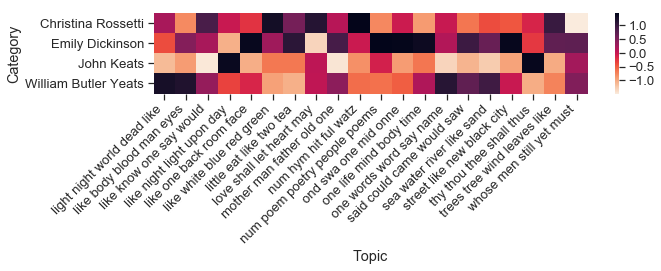

In [52]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

lmw.plot_categories_by_topics_heatmap(authors,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(10,4))

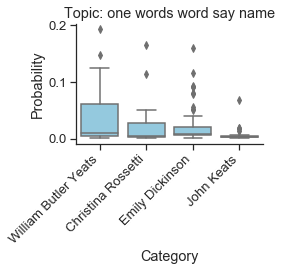

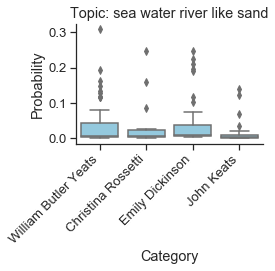

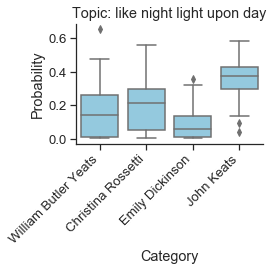

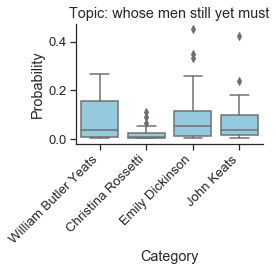

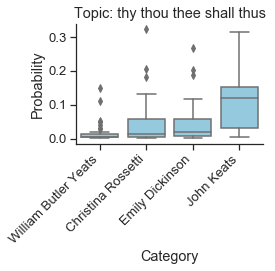

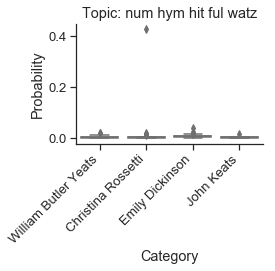

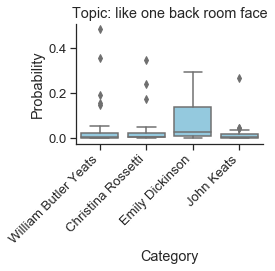

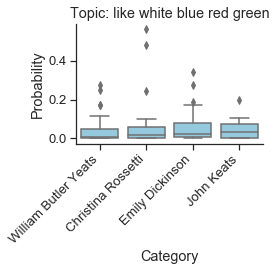

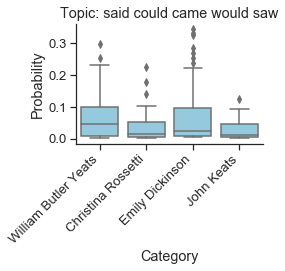

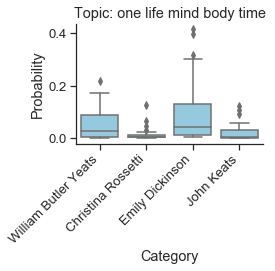

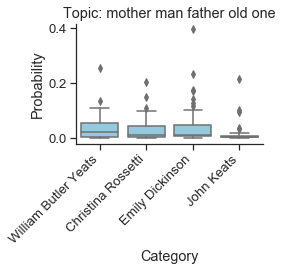

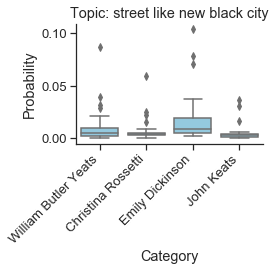

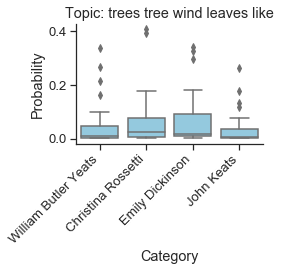

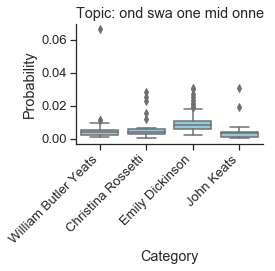

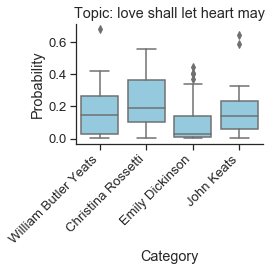

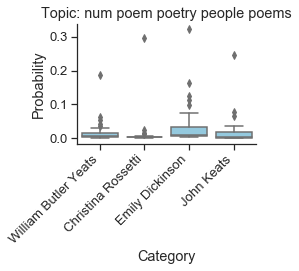

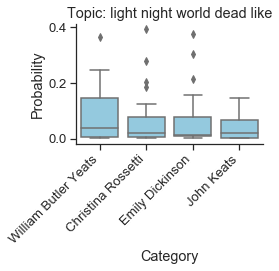

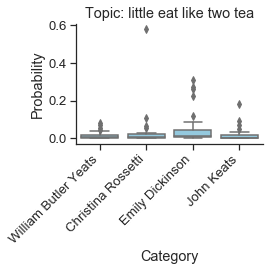

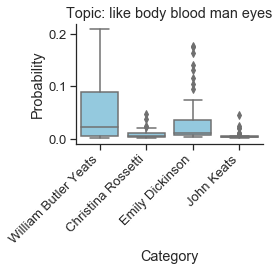

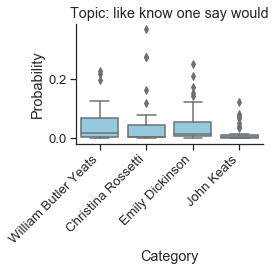

In [53]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

for _topic_index in range(0, len(topics)):
    
    lmw.plot_categories_by_topic_boxplots(authors,
                                          topic_distributions,
                                          topics, 
                                          _topic_index,
                                          output_path=output_directory_path + '/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))

<br><br>

# Plot topics over time

In [69]:
divided_documents, document_ids, times = lmw.divide_training_data(training_documents,
                                                                  num_chunks=10)

len(divided_documents), len(document_ids), len(times)

(156520, 156520, 156520)

In [59]:
path_to_divided_training_data           = output_directory_path + '/training.split.txt'
path_to_divided_formatted_training_data = output_directory_path + '/mallet.split.training'
path_to_divided_topic_distributions     = output_directory_path + '/mallet.split.topic_distributions.' + str(num_topics)

In [60]:
lmw.import_data(path_to_mallet,
                path_to_divided_training_data,
                path_to_divided_formatted_training_data,
                divided_documents,
                path_to_formatted_training_data)

Importing data...
Complete


In [63]:
lmw.infer_topics(path_to_mallet,
                 path_to_model,
                 path_to_divided_formatted_training_data,
                 path_to_divided_topic_distributions)

Inferring topics using pre-trained model...


In [65]:
topic_distributions = lmw.load_topic_distributions(path_to_divided_topic_distributions)

len(topic_distributions), len(topic_distributions[2])

(156520, 20)

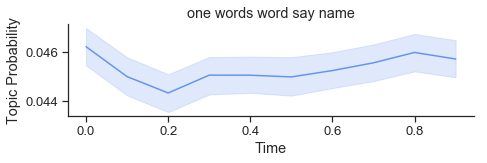

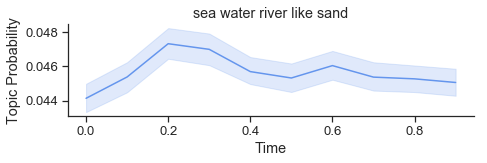

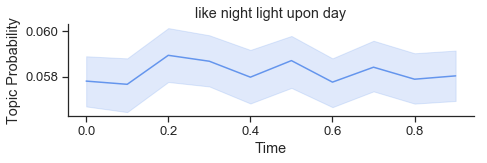

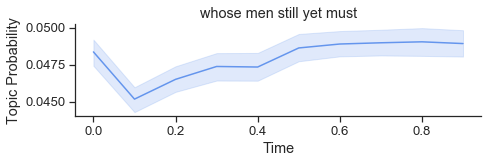

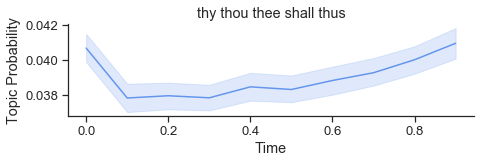

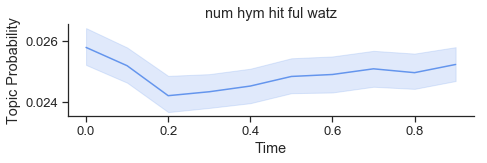

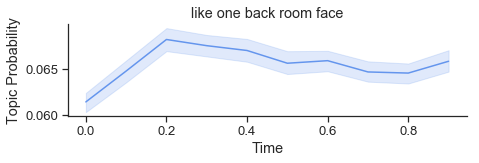

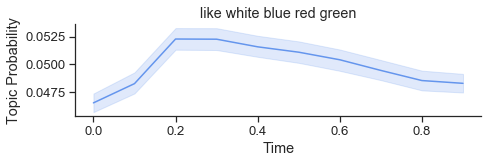

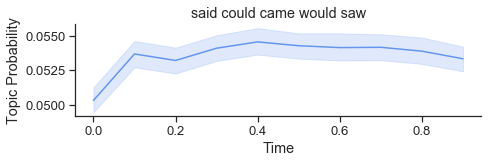

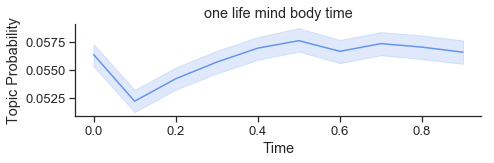

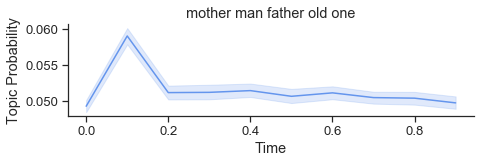

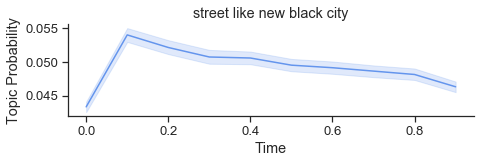

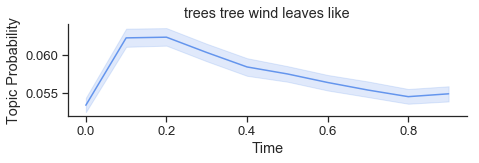

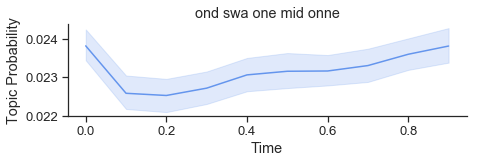

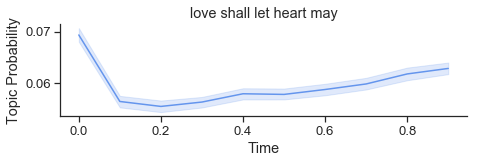

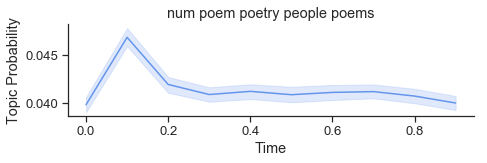

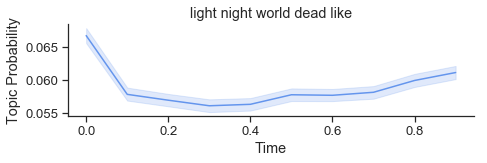

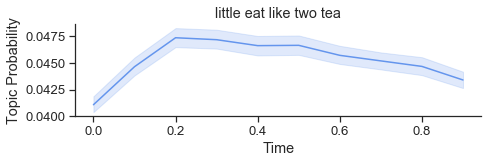

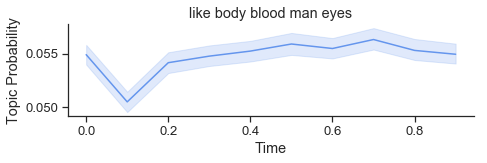

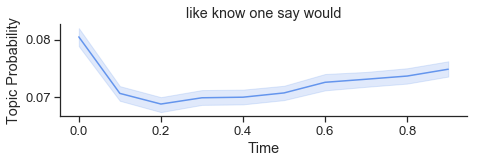

In [70]:
for _topic_index in range(0, len(topics)):
    lmw.plot_topics_over_time(topic_distributions, topics, times, _topic_index)